## Regression 

In today's tutorial I will discuss Regression and its implementation in Python.
The basic assumption of Regression Model are :
- Linear relationship (Incase of Linear Regression): Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
- Little or no multi-collinearity: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
- Normality: Errors are normally distributed which intutively means they follow the bell curve distribution.
- Constant Variance: This is also known as conditional homeskedasticity, which means that varaince of error terms is constant.
- Conditionally Uncorrelated errors: It is assumed that covariance of all the error terms is 0.
- Strict Exogeneity: Regressors are strictly exogenous such that error terms are random with (conditional and unconditional) mean 0.

To start with I will use Boston House datasets. We can get the data from Sci-kit Learn Package and we will see the relationship of house prices with different variables.

## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn import linear_model, metrics
from sklearn.datasets import load_boston

In [17]:
# load the boston dataset
boston_dataset = load_boston()

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
boston_dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000 (Bk — 0.63)², where Bk is the proportion of (people of African American descent) by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

## Loading Data

In [5]:
#load data in dataframe
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
#display first 5 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston.shape

(506, 13)

We see that MEDV is not present in our data as it is our target variable stored in 'target' Key in boston.

In [7]:
boston["MEDV"] = boston_dataset["target"]

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Analysis 
After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [9]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

C:\Users\uzeea\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\uzeea\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\uzeea\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\uzeea\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Suppor

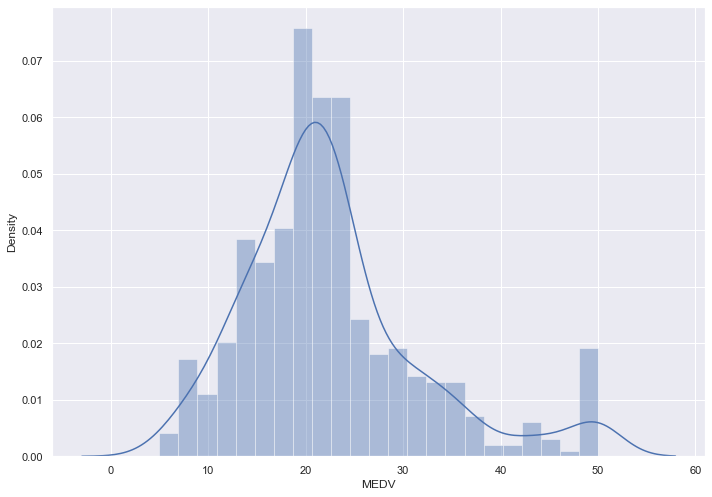

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston["MEDV"])

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

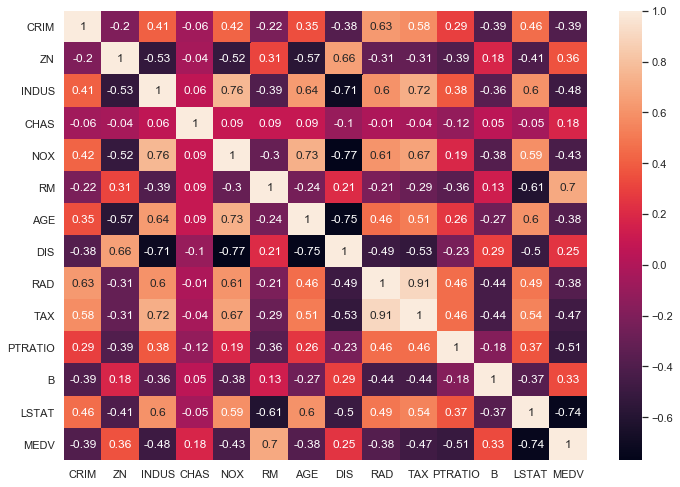

In [11]:
#get correlation from data frame and round it to 2 d.p
corr_matrix = boston.corr().round(2)
#make the heat map by using seaborn 
ax = sns.heatmap(data =corr_matrix,annot = True)
#to adjust the figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set(rc={'figure.figsize':(11.7,8.27)})

We see that some variables like RAD and TAX are highly positive correlated so we should not use them together as it will create problem of Multi Collinearity.

Now if we want to find relationship between Average House Prices with Average Number of Rooms per dwelling.
Model equation will be this 
$$\hat{Average House Price} = \hat{\beta}_{0} + \hat{\beta}_{1}*Rooms per dwelling  $$
where $\hat{\beta}_{0}$ is Intercept term when Rooms per dwelling is 0 and $\hat{\beta}_{1}$ is Population estimate for Rooms per dwelling    

Our goal is to find the $\hat{b}_{0}$ and $\hat{b}_{1}$ using Ordinary Least Square Estimates.

In [12]:
import statsmodels.api as sm
#build the model,keeping dependent variable as Average House Price and 
#independent variable as number of rooms per dwelling.
Y = boston["MEDV"]
X = boston["RM"]
X = sm.add_constant(X)
#model is created
model = sm.OLS(Y,X)
#model is estimated
results = model.fit()

C:\Users\uzeea\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.49e-74
Time:                        13:59:55   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

## Interpretation of Coefficients


$\hat{b}_{0} $ : Average House Price is negative 34670 dollars when number of rooms are 0. Since we know that Prices cannot be negative so this estimate does not make sense.<br>
$\hat{b}_{1} $ : When average number of rooms per dwelling increases by 1 room, Average House Prices increases by 9102 dollars.<br>
This tells us that there is a positive relation: increase in number of rooms will increase in house prices which is true. 

In [14]:
# compute the residuals
results.resid

0     -1.175746
1     -2.174021
2      3.971968
3      4.374062
4      5.817848
         ...   
501   -2.939584
502   -0.434286
503   -4.925691
504   -5.169108
505   -8.315096
Length: 506, dtype: float64

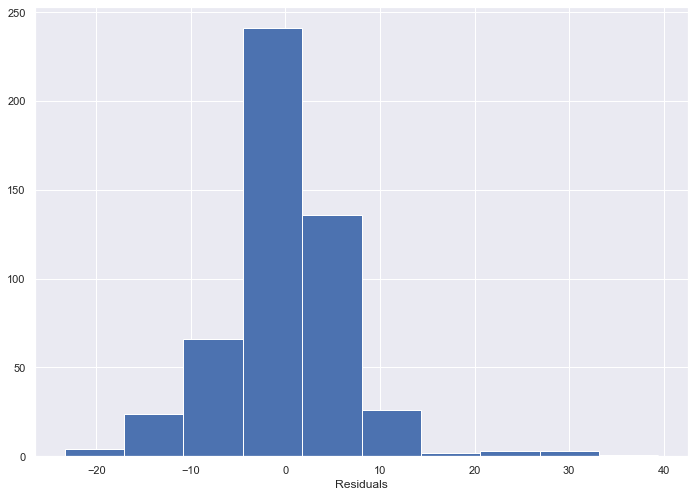

In [15]:
#plot the residuals
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(results.resid)
plt.xlabel("Residuals")
plt.show()

The plot shows that errors are approximately normally distributed so Normality assumption is satisfied.

C:\Users\uzeea\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\uzeea\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\uzeea\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


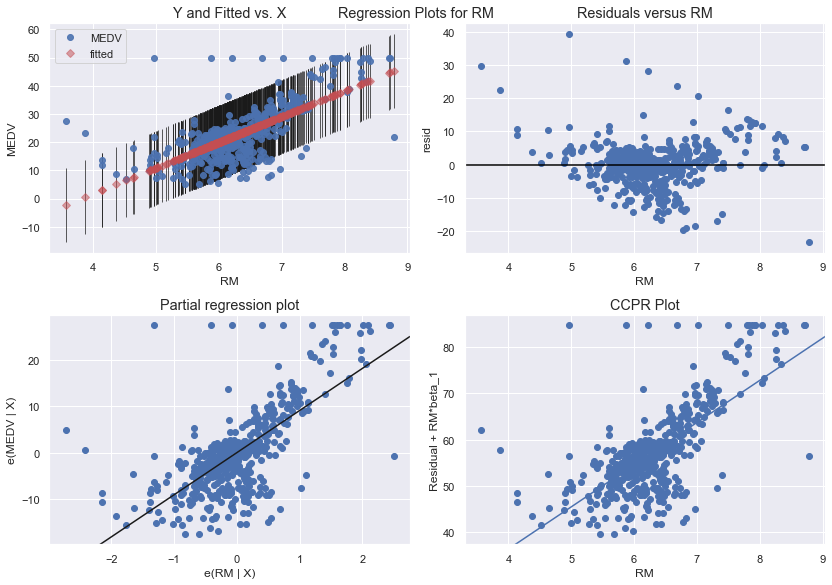

In [16]:
#plots of model evaluation
fig = sm.graphics.plot_regress_exog(results, "RM")
fig.tight_layout(pad=1.0)
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Plot Interpretations
- From first figure we see our fitted line (red colour) on our data. The (black line) is the confidence interval for each point estimates
- From second figure in first row we clearly see that errors are not random and they seems to be dependent on Rooms per dwelling which is the violation of constant variation assumption hence there is problem of Hetrosckedacity.

## END 